# Modelo para prever a demanda por cimento

Versão refatorada que tenta prever os valores da demanda, e não a tendência

Nesse notebook carregamos os dados de `TCC/dados/anualizados/csv/` e implementamos uma rede feed forward simples para prever a demanda por cimento de acordo com o estado

Definimos um range de tempo  de janeiro do ano 1991 até dezembro de 2019, adotamos a variável `anomes` para indicar tempo: `199101 <= anomes <= 201912`

Supomos, sempre, que os estados estão ordenado sem ordem alfabética nas tabelas. Além disso, supomos que a primeira coluna da tabela indica a medição janeiro de 1991 (anomes = 199101) e a última, dezembro de 2019 (anomes = 201912), com frequência mensal.

In [2]:
# devolve um array com os valores de ano e mes considerados no modelo
# de janeiro de ANO_INICIAL=1991 ate dezembro de ANO_FINAL=2019
def get_anomes ():

    anos = [str(i) for i in range(ANO_INICIAL, ANO_FINAL+1)]

    # colocamos os 0 a esquerda se precisar
    meses = ["{:02d}".format(i) for i in range(1,13)] 

    anomes = []

    for ano in anos:
        anomes += [str(ano) + i for i in meses]

    return anomes

In [3]:
# funcao que pega um pandas dataframe e coloca os valor 
# no array que sera usado como entrada para o  modelo
def df_to_list(indicador, array : list):

    anomes = get_anomes()
  
    index = 0 

    for coluna in anomes:

        for linha in indicador[coluna]:

            array[index] = array[index] + [linha]
            index += 1
    
    return array

In [4]:
# Carrega os dados de consumo de cimento 
# do PATH e
# devolve uma lista com a tendencia de demanda
def get_consumo (path : str) -> list :

    import pandas as pd

    anomes = get_anomes()

    consumo = pd.read_csv(path + "consumo.csv")

    tendencia = []

    for ind in anomes:

        # estados...
        for estado in consumo.index:
        
            tendencia += [float (consumo[ind][estado])]

    return tendencia

In [5]:
# Lê os arquivos csv presentes em 'indicadores' que se encontram no path
# definido na variavel path e carrega no df de entrada, que, na verdade,
# é uma lista
def get_df (path : str, indicadores : list) -> list:

    import pandas as pd

    df = [[i] for i in range(1,28)] * len(get_anomes())

    for ind in indicadores:

      print(f"Carregando o indicador: {ind[:-3]}")
      df = df_to_list(pd.read_csv(path + ind), df)

    return df

In [6]:
### Constantes que definimos
ANO_INICIAL = 1991
ANO_FINAL = 2019
PATH = "../dados/anualizados/csv/"
INDICADORES = [
    "consumo.csv",
    "desemprego.csv",
    "estoque.csv",
    "idh_educacao.csv",
    "idh_renda.csv",
    "idh_saude.csv",
    "IGP.csv",
    "INCC.csv",
    "IPCA.csv",
    "NFSP.csv",
    "pib_construcao.csv",
    "pib_per_capita.csv",
    "pib_precos_constantes.csv",
    "pib_precos_mercado_corrente.csv",
    "populacao.csv",
    "SELIC.csv"]

QUEDA=-1
ESTAB=0
AUMENTO=1

In [7]:
# Dados do consumo 
# from load_data import get_consumo 
tendencia = get_consumo(PATH)

In [8]:
# Dados de entrada 
# from load_data import get_df 
df = get_df(PATH, INDICADORES)

Carregando o indicador: consumo.
Carregando o indicador: desemprego.
Carregando o indicador: estoque.
Carregando o indicador: idh_educacao.
Carregando o indicador: idh_renda.
Carregando o indicador: idh_saude.
Carregando o indicador: IGP.
Carregando o indicador: INCC.
Carregando o indicador: IPCA.
Carregando o indicador: NFSP.
Carregando o indicador: pib_construcao.
Carregando o indicador: pib_per_capita.
Carregando o indicador: pib_precos_constantes.
Carregando o indicador: pib_precos_mercado_corrente.
Carregando o indicador: populacao.
Carregando o indicador: SELIC.


## Treinamento do modelo

Vamos treinar uma rede neural utilizando a biblioteca TensorFlow

Dividimos os dados em:
- 70%: treino
- 30%: teste

In [9]:
# Importando as libs

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [10]:
# separando conjuntos de treino e teste (70% e 30%)
X_train, X_test, y_train, y_test = train_test_split(df, tendencia,test_size=0.3)

In [11]:
# vamos definir o modelo
# Sequential
model = keras.Sequential()
model.add(Dense(17, input_shape=(17,), activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1))

In [12]:
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mse'])

In [13]:
model.fit(X_train, y_train, epochs=10) 

Epoch 1/10
206/206 [==============================] - 1s 2ms/step - loss: 14215927562240.0000 - mse: 14215927562240.0000
Epoch 2/10
206/206 [==============================] - 0s 1ms/step - loss: 4414222893056.0000 - mse: 4414222893056.0000
Epoch 3/10
206/206 [==============================] - 0s 1ms/step - loss: 1953476771840.0000 - mse: 1953476771840.0000
Epoch 4/10
206/206 [==============================] - 0s 1ms/step - loss: 909845266432.0000 - mse: 909845266432.0000
Epoch 5/10
206/206 [==============================] - 0s 2ms/step - loss: 400561209344.0000 - mse: 400561209344.0000
Epoch 6/10
206/206 [==============================] - 1s 3ms/step - loss: 166846578688.0000 - mse: 166846578688.0000
Epoch 7/10
206/206 [==============================] - 1s 3ms/step - loss: 130375639040.0000 - mse: 130375639040.0000
Epoch 8/10
206/206 [==============================] - 1s 3ms/step - loss: 1163767054336.0000 - mse: 1163767054336.0000
Epoch 9/10
206/206 [==============================] - 

In [14]:
# Avaliacao
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

89/89 - 0s - loss: 234803576832.0000 - mse: 234803576832.0000 - 203ms/epoch - 2ms/step


In [16]:
# previsao
predictions = model.predict(X_test)

89/89 [==============================] - 0s 1ms/step


In [55]:
from cProfile import label
from turtle import color
import matplotlib.pyplot as plt 
import seaborn as sns


In [56]:
states = [i[0] for i in X_test]
pred = [i[0] for i in predictions]

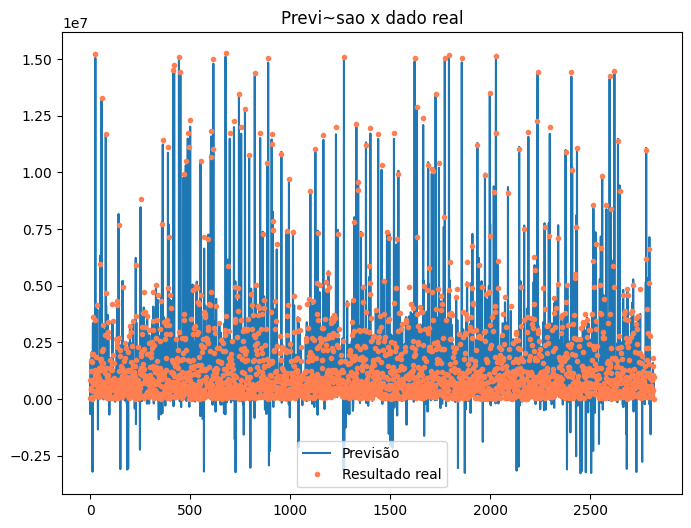

In [61]:
plt.figure(figsize=(8,6))

plt.title("Previsão x dado real")


plt.plot(pred, label="Previsão")
plt.plot(y_test, marker=".", color="coral", linestyle=' ', label="Resultado real")
plt.legend()

plt.show()

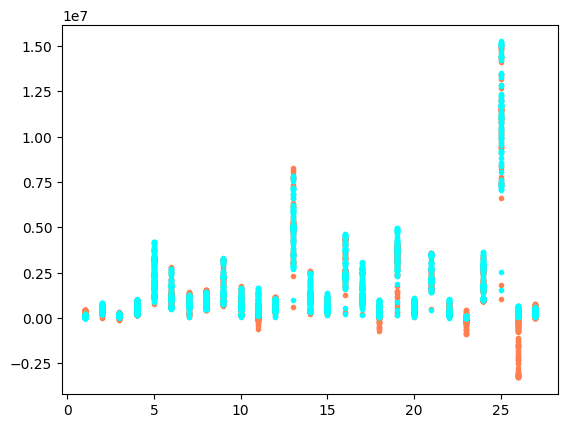

In [51]:
plt.scatter(states, pred, color="coral", label="Previsão", marker=".")
plt.scatter(states, y_test, color="aqua", label="Previsão", marker=".")

plt.show()
